In [1]:
import os
import glob
import shutil

Remove unneeded image

In [ ]:
def move_rgb_files(parent_folder):
    
    for subfolder in os.listdir(parent_folder):
        subfolder_path = os.path.join(parent_folder, subfolder)
        if os.path.isdir(subfolder_path):
            color_folder = os.path.join(parent_folder, "Colored")

            if not os.path.exists(color_folder):
                os.makedirs(color_folder)


            for filename in os.listdir(subfolder_path):
                if 'RGB' in filename:
                    source_file = os.path.join(subfolder_path, filename)
                    dest_file = os.path.join(color_folder, filename)
                    
                    shutil.move(source_file, dest_file)
                    # print(f"moving: {filename} → {color_folder}")

    print("completed")

In [ ]:
imageFolder = "E:\\NYU\\pencreatic cancer AI\\0526\\NewData"
move_rgb_files(imageFolder)

To see if the photo is the same as previous

In [ ]:
import cv2
import numpy as np

def dyeing_one_color(photo_address):
    img = cv2.imread(photo_address)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    lower_gray = 10
    upper_gray = 50
    mask = cv2.inRange(gray, lower_gray, upper_gray)

    # colored_img = img.copy()
    # colored_img[mask == 255] = [0, 0, 255]
    
    # cv2.imwrite('E:\\NYU\\pencreatic cancer AI\\others\\colored_output.png', colored_img)
    # cv2.imshow('Result', colored_img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()


In [ ]:
img1 = dyeing_one_color("E:\\NYU\\pencreatic cancer AI\\0526\\NewData\\Images 0\\DiD-MSLN_NYU360_5 percent 20ms_T001_XY1.tif")


Extract features from one image

In [69]:
import matplotlib.pyplot as plt

def extract_features(photo_address):
    gray_img = cv2.imread(photo_address, cv2.IMREAD_GRAYSCALE)
    _, binary_img = cv2.threshold(gray_img, 3, 255, cv2.THRESH_BINARY)
    # plt.imshow(binary_img, cmap='gray')
    # plt.title('Binary Image')
    # plt.axis('off')
    # plt.show()
    
    contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    one_img_trait = []
    
    for i, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        circularity = (4 * np.pi * area) / (perimeter ** 2 + 1e-6)
        
        (x, y), radius = cv2.minEnclosingCircle(contour)
        circle_area = np.pi * (radius ** 2)
        
        # brightness
        contour_mask = np.zeros(gray_img.shape, dtype=np.uint8)
        cv2.drawContours(contour_mask, [contour], -1, 255, -1)
        mean_val = cv2.mean(gray_img, mask=contour_mask)[0]
        
        result = [area, perimeter, circularity, radius, circle_area, mean_val]
        one_img_trait.append(result)
    
    results_array = np.array(one_img_trait)

    return (results_array)    

In [33]:
test_photo_add = "E:\\NYU\\pencreatic cancer AI\\0526\\NewData\\Images 0\\DiD-MSLN_NYU360_5 percent 20ms_T001_XY1.tif"

In [70]:
arr = extract_features(test_photo_add)
print(len(arr))

246


In [71]:
def load_sequences(root_dir):
    """
    Loads time-series feature sequences and labels
    Expects: /NewData
    Returns: X_seq, y_labels
    """
    X_seq = []
    y_labels = []


    for class_name, label in [('Images 0', 0), ('Images 0.5', 0.5), ('Images 1', 1)]:
        class_dir = os.path.join(root_dir, class_name)
        image_files = (os.listdir(class_dir))
        for each_img_name in image_files:
            each_img = os.path.join(class_dir, each_img_name)

            seq = extract_features(each_img)

            if len(seq) > 0:
                X_seq.append(seq)
                y_labels.append(label)

    return X_seq, y_labels

In [72]:
root_dir = "E:\\NYU\\pencreatic cancer AI\\0526\\NewData"
X_train_seq, y_train_labels = load_sequences(root_dir)
print(len(X_train_seq))

156


In [ ]:
print(len(y_train_labels))

In [ ]:
X_train_seq = np.array(X_train_seq)
y_train_labels = np.array(y_train_labels)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (156,) + inhomogeneous part.

In [68]:
for each in (X_train_seq):
    print(len(each))

246
72
109
187
39
76
85
238
71
104
199
55
83
87
255
80
109
184
54
75
92
265
75
111
191
49
71
91
240
83
105
184
51
76
99
238
81
111
181
51
73
88
240
76
125
161
52
79
87
245
80
111
26
99
105
3
155
24
91
96
3
146
22
91
108
3
156
21
92
103
3
152
20
87
110
3
153
20
86
102
3
147
22
85
105
3
151
29
82
102
3
159
26
83
101
3
149
25
86
105
3
151
28
83
4
2
3
1
13
4
3
5
2
4
3
12
4
3
4
3
4
1
12
4
3
3
3
4
1
16
4
3
5
2
5
1
12
4
2
4
2
6
1
10
5
3
4
2
6
1
19
5
2
4
3
5


In [79]:
# making the input with same length

def padding(list_of_arrays):
    max_rows = max(arr.shape[0] for arr in list_of_arrays)
    max_cols = max(arr.shape[1] for arr in list_of_arrays)
    def pad_array(array, target_rows, target_cols):
        padded = np.zeros((target_rows, target_cols))
        padded[:array.shape[0], :array.shape[1]] = array
        return padded
    
    padded_arrays = [pad_array(arr, max_rows, max_cols) for arr in list_of_arrays]
    
    padded_batch = np.stack(padded_arrays)
    print(f"batch shape: {padded_batch.shape}")
    return padded_batch

In [80]:
X_train_seq = padding(X_train_seq)

batch shape: (156, 265, 6)


In [76]:
y_train_labels = np.array(y_train_labels)

In [77]:
print(y_train_labels.shape)

(156,)


In [82]:
import copy
padded_batch = copy.deepcopy(X_train_seq)


flattened_batch = padded_batch.reshape(156, -1)  # (156, 1590)
print(flattened_batch.shape)

(156, 1590)


In [83]:
import torch
import torch.nn as nn

class MLP_Embedder(nn.Module):
    def __init__(self, input_dim, embed_dim):
        super(MLP_Embedder, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, embed_dim)  # output 512
        )

    def forward(self, x):
        return self.model(x)

In [84]:
input_dim = 265 * 6  # 1590
embed_dim = 128  # or 512

embedder = MLP_Embedder(input_dim, embed_dim)

In [85]:
# transform the numpy array to tensor data with float32
flattened_tensor = torch.tensor(flattened_batch, dtype=torch.float32)

In [86]:
embedding_output = embedder(flattened_tensor)
print(embedding_output.shape)

torch.Size([156, 128])


Training the above model 

In [87]:
labels = torch.tensor(y_train_labels, dtype=torch.long)  # shape (156,)

In [88]:
import torch.optim as optim


classifier = nn.Linear(embed_dim, 3)  # 0, 0.5, 1
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(list(embedder.parameters()) + list(classifier.parameters()), lr=1e-3)

for epoch in range(100):
    optimizer.zero_grad()
    embedding_output = embedder(flattened_tensor)
    logits = classifier(embedding_output)
    loss = criterion(logits, labels)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 16.04538345336914
Epoch 10, Loss: 1.1951361894607544
Epoch 20, Loss: 0.29373496770858765
Epoch 30, Loss: 0.25686970353126526
Epoch 40, Loss: 0.13396556675434113
Epoch 50, Loss: 0.056867312639951706
Epoch 60, Loss: 0.01710459589958191
Epoch 70, Loss: 0.00678921677172184
Epoch 80, Loss: 0.004532098304480314
Epoch 90, Loss: 0.004516197368502617


In [89]:
final_embeddings = embedder(flattened_tensor).detach().numpy()

In [96]:
print(final_embeddings.shape)

(156, 128)


In [ ]:
%pip install matplotlib scikit-learn umap-learn

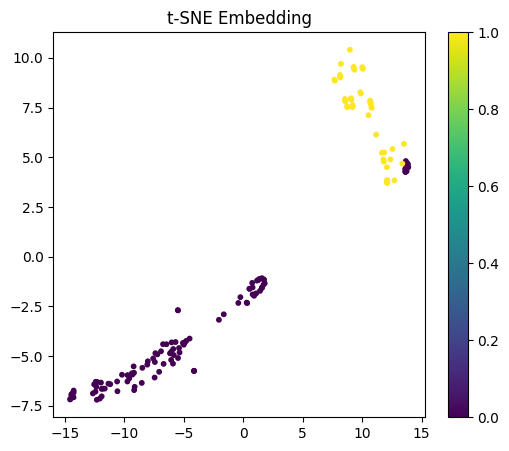

In [ ]:
from sklearn.manifold import TSNE

# embedding_output is (156, 128)
# labels are (156,) → 0, 0.5, 1
# numpy array

# ---------- t-SNE ----------
tsne = TSNE(n_components=2, random_state=42)
embedding_tsne = tsne.fit_transform(final_embeddings)

plt.figure(figsize=(6, 5))
plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], c=labels, cmap='viridis', s=10)
plt.title('t-SNE Embedding')
plt.colorbar()
plt.show()


c:\Users\Simon\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


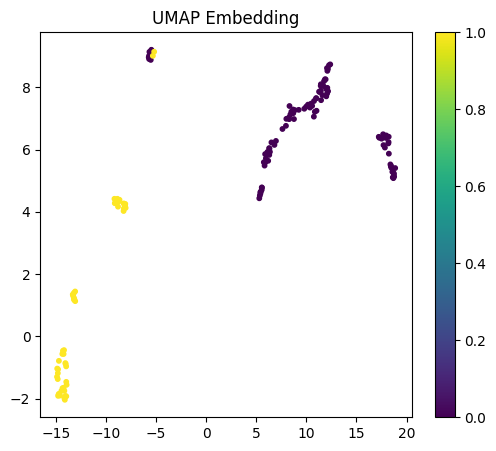

In [94]:
import umap
# ---------- UMAP ----------
reducer = umap.UMAP(random_state=42)
embedding_umap = reducer.fit_transform(final_embeddings)

plt.figure(figsize=(6, 5))
plt.scatter(embedding_umap[:, 0], embedding_umap[:, 1], c=labels, cmap='viridis', s=10)
plt.title('UMAP Embedding')
plt.colorbar()
plt.show()



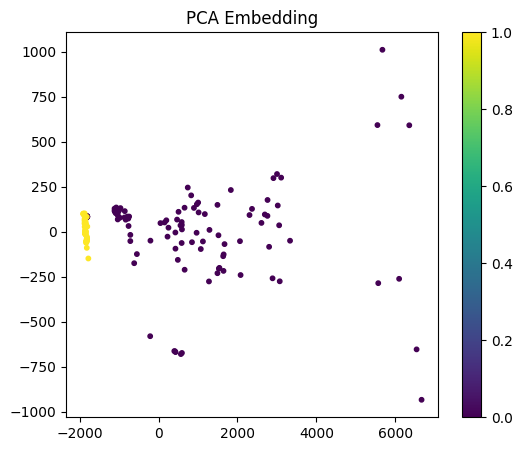

In [95]:
# ---------- PCA ----------
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embedding_pca = pca.fit_transform(final_embeddings)

plt.figure(figsize=(6, 5))
plt.scatter(embedding_pca[:, 0], embedding_pca[:, 1], c=labels, cmap='viridis', s=10)
plt.title('PCA Embedding')
plt.colorbar()
plt.show()